<h2> Use coin stats (easy case) to classify coins</h2>
**1)** Upload CSV with coins label, size (pix), mean saturation at centre region, mean saturation on sides, saturation difference (sides - centre)

In [1]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
       fname = fn

Saving Training_CoinsEasy_stats.csv to Training_CoinsEasy_stats.csv


**2)** Read file contents (description on 1st row)
*   <i>Category</i> is a string list with each coin category ('0.01', '0.02', ...)
*   <i>data</i> is a Numpy matrix with size, satC, satSides and SatDiff on each column



In [2]:
import numpy as np
N = 1
data = np.ones((N, 4), dtype=np.int64) #data values (size, satC, satSide, Sat diff)
Category = []
with open(fname, 'r') as fp:
  num_lines = sum(1 for line in fp) #find out number of lines in file
  N = num_lines - 1 #1st line is description
  data.resize((N, 4)) #create storage for it
  fp.seek(0) #rewind file pointer to start again
  #first line contains columns descriptions
  labels = fp.readline().replace('\n','') #string
  labels = labels.split(',') #string split as list elements
  row=0
  for lines in fp.readlines():
    txt = lines.replace('\n','')
    txt = txt.split(',')
    Category.append(txt[0]) #Coin category
    for col in range(4):
      data[row][col] = txt[col+1]
    row = row + 1
  print('Read ' + str(row) + ' entries')
print(Category[0] + str(data[0]))
print(Category[1] + str(data[1])+'\n......')

Read 115 entries
0.01[103 116 119   3]
0.01[104 131 147  16]
......


**3)** Plot classes on 3D feature space (size, saturation centre, saturation sides)

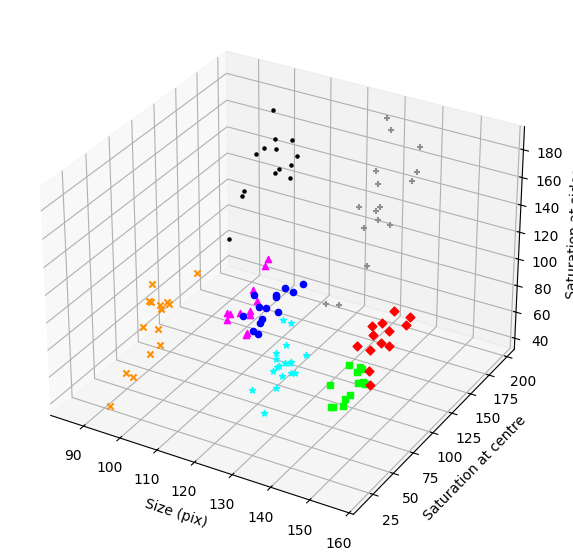

In [3]:
import matplotlib.pyplot as plt
#creates class marker and colour from category ('0.01', '0.02', etc)
def create_marker(ct):
  if ct == '0.01':
    return ('.', '#000000')
  elif ct == '0.02':
    return ('+', '#8F8F8F')
  elif ct == '0.05':
    return ('x', '#FF8F00')
  elif ct == '0.1':
    return ('*', '#00FFFF')
  elif ct == '0.2':
    return ('^', '#FF00FF')
  elif ct == '0.5':
    return ('s', '#00FF00')
  elif ct == '1':
    return ('o', '#0000FF')
  else: #£2
    return ('D', '#FF0000')

fig = plt.figure(figsize=[9.0, 7.0])
ax = fig.add_subplot(projection='3d') #creates mplot3d 3D Axes
ax.set_xlabel('Size (pix)')
ax.set_ylabel('Saturation at centre')
ax.set_zlabel('Saturation at sides')
for row in range(N):
  m, clr = create_marker(Category[row])
  ax.scatter(data[row][0], data[row][1], data[row][2], c = clr, marker = m )
plt.show()

**4)** Train <b>Naive Bayes classifier</b> (assuming Gaussian PDFs)<br>
Using [Scikit-learn](https://scikit-learn.org/stable/index.html) [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) implementation

Training complete!


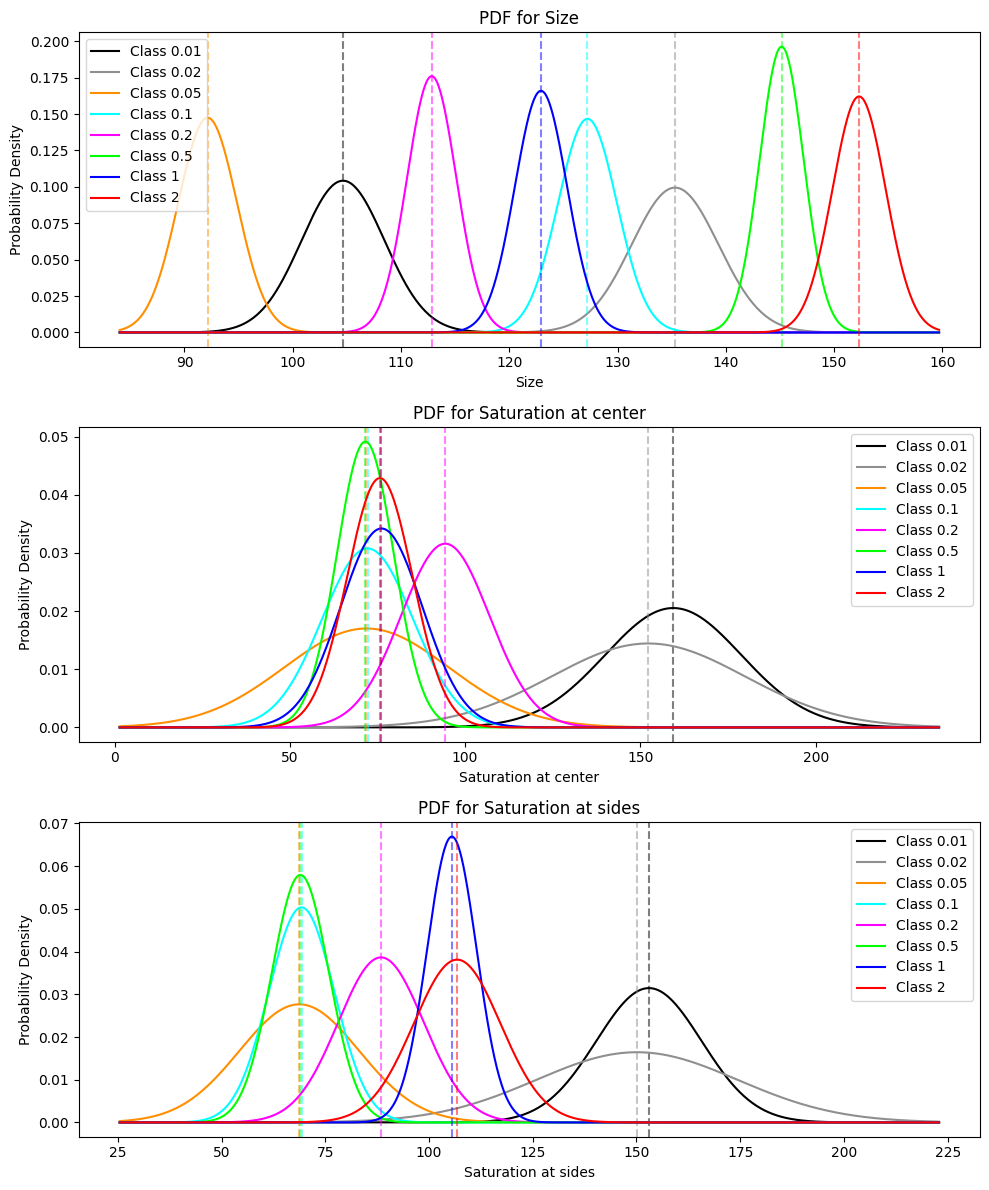

<ipython-input-4-70f681af8bee>:133: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[mask, i], X[mask, j], c=color, marker=marker, edgecolors='k', label=class_label)
<ipython-input-4-70f681af8bee>:133: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[mask, i], X[mask, j], c=color, marker=marker, edgecolors='k', label=class_label)
<ipython-input-4-70f681af8bee>:133: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[mask, i], X[mask, j], c=color, marker=marker, edgecolors='k', label=class_label)
<ipython-input-4-70f681af8bee>:133: U

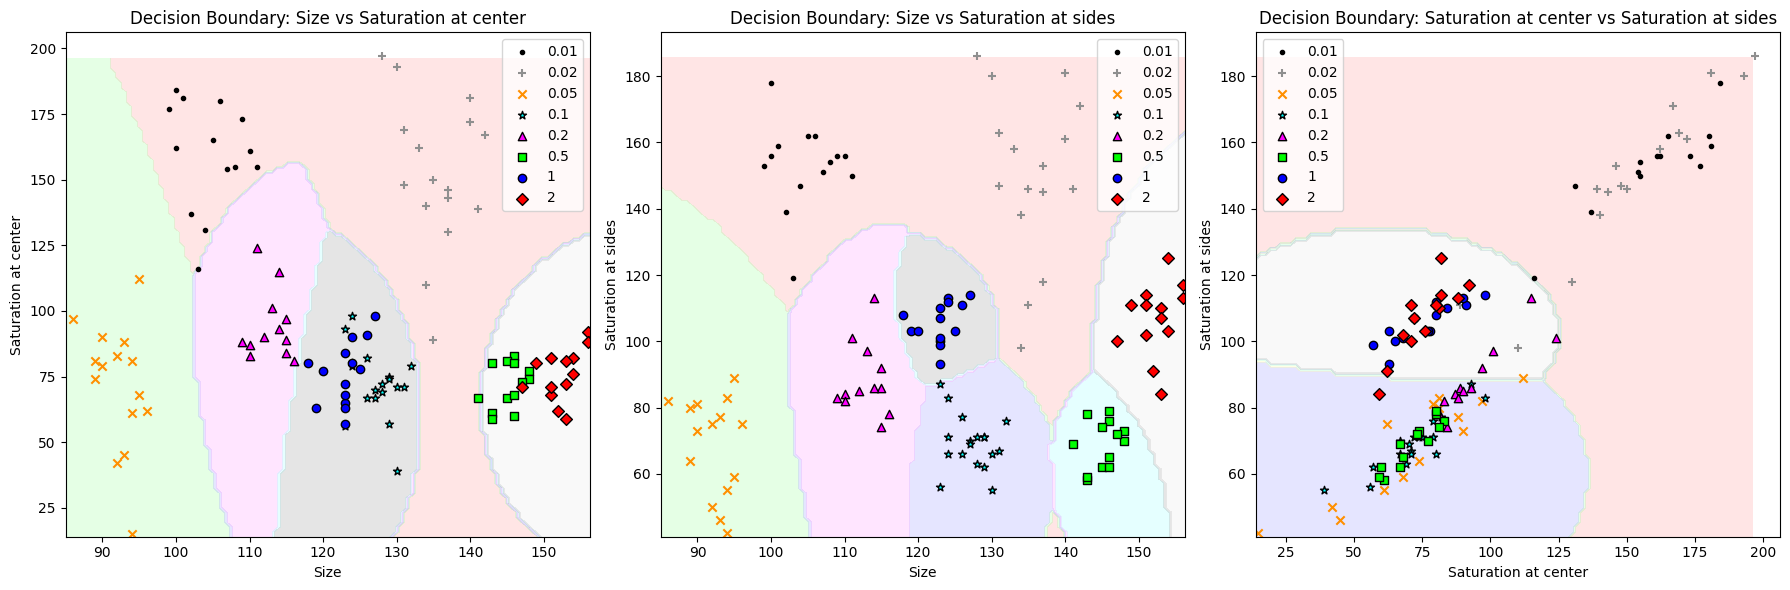

Class means (theta):
0.01: [104.64285714 159.35714286 153.        ]
0.02: [135.3125 152.25   150.125 ]
0.05: [92.13333333 71.86666667 68.73333333]
0.1: [127.22222222  72.16666667  69.27777778]
0.2: [112.83333333  94.33333333  88.41666667]
0.5: [145.15384615  71.53846154  69.        ]
1: [122.92857143  76.14285714 105.5       ]
2: [152.30769231  75.69230769 106.76923077]

Class variances (sigma):
0.01: [ 14.65816482 377.94387911 160.85714441]
0.02: [ 16.08984531 764.18750156 588.73437656]
0.05: [  7.31555711 550.38222378 208.06222378]
0.1: [  7.39506328 168.13889045  62.7561744 ]
0.2: [  5.13889045 159.55555711 106.57639045]
0.5: [ 4.13017907 65.94082996 47.38461694]
1: [  5.7806138  136.12245054  35.53571584]
2: [  6.05917315  86.67455777 109.56213173]

Class priors:
0.01: 0.12173913043478261
0.02: 0.1391304347826087
0.05: 0.13043478260869565
0.1: 0.1565217391304348
0.2: 0.10434782608695652
0.5: 0.11304347826086956
1: 0.12173913043478261
2: 0.11304347826086956


In [4]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
#remove data col 3 (sat diff), leave only Size, SatC, SatSides
X = np.delete(data, 3, axis=1)
model.fit(X, Category); #data matrix, category for each row
print('Training complete!')
# Add this code after your model is trained (after step 4)

def plot_gaussian_pdfs(model, feature_names=['Size', 'Saturation at center', 'Saturation at sides']):
    """
    Plot the Gaussian PDFs for each class and feature that the Naive Bayes model has learned.

    Parameters:
    model: Trained GaussianNB model
    feature_names: Names of the features for better visualization
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.stats import norm

    # Extract model parameters
    theta = model.theta_  # mean of each feature per class
    sigma = model.var_  # variance of each feature per class
    classes = model.classes_  # class labels

    n_classes = len(classes)
    n_features = len(feature_names)

    # Set up the figure
    fig, axes = plt.subplots(n_features, 1, figsize=(10, 4 * n_features))

    # For each feature
    for i in range(n_features):
        ax = axes[i]

        # Find the range to plot
        min_val = min(theta[:, i] - 3 * np.sqrt(sigma[:, i]))
        max_val = max(theta[:, i] + 3 * np.sqrt(sigma[:, i]))
        x = np.linspace(min_val, max_val, 1000)

        # Plot the PDF for each class
        for j, class_label in enumerate(classes):
            mean = theta[j, i]
            var = sigma[j, i]
            y = norm.pdf(x, mean, np.sqrt(var))

            # Get the marker and color for this class
            marker, color = create_marker(class_label)

            # Plot the PDF
            ax.plot(x, y, color=color, label=f'Class {class_label}')

            # Mark the mean with a vertical line
            ax.axvline(x=mean, color=color, linestyle='--', alpha=0.5)

        ax.set_title(f'PDF for {feature_names[i]}')
        ax.set_xlabel(feature_names[i])
        ax.set_ylabel('Probability Density')
        ax.legend()

    plt.tight_layout()
    plt.show()

# Call the function after training your model
plot_gaussian_pdfs(model)

# You can also visualize the decision boundaries in 2D for pairs of features
def plot_decision_boundaries(model, X, y, feature_names=['Size', 'Saturation at center', 'Saturation at sides']):
    """
    Plot the decision boundaries for pairs of features.

    Parameters:
    model: Trained GaussianNB model
    X: Feature matrix
    y: True labels
    feature_names: Names of the features
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.colors import ListedColormap

    # Create a colormap for the decision boundaries
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA', '#FFAAFF', '#AAFFFF', '#AAAAAA', '#EEEEEE'])

    n_features = X.shape[1]

    # Create figure
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Define the feature pairs to plot
    feature_pairs = [(0, 1), (0, 2), (1, 2)]

    for idx, (i, j) in enumerate(feature_pairs):
        ax = axes[idx]

        # Determine plot boundaries
        x_min, x_max = X[:, i].min() - 1, X[:, i].max() + 1
        y_min, y_max = X[:, j].min() - 1, X[:, j].max() + 1

        # Create a meshgrid
        xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min) / 100),
                            np.arange(y_min, y_max, (y_max - y_min) / 100))

        # Create a feature matrix with just the two features we're plotting
        mesh_X = np.c_[xx.ravel(), yy.ravel()]

        # We need to create a full feature matrix with dummy values for the other feature
        full_mesh_X = np.zeros((mesh_X.shape[0], n_features))

        # Use the mean values of all features as defaults
        feature_means = X.mean(axis=0)
        for k in range(n_features):
            full_mesh_X[:, k] = feature_means[k]

        # Replace the two features we're plotting
        full_mesh_X[:, i] = mesh_X[:, 0]
        full_mesh_X[:, j] = mesh_X[:, 1]

        # Predict on the mesh grid
        Z = model.predict(full_mesh_X)
        Z = np.array([list(model.classes_).index(z) for z in Z])

        # Reshape the predictions back to the meshgrid shape
        Z = Z.reshape(xx.shape)

        # Plot the decision boundary
        ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)

        # Plot the training points
        for class_label in model.classes_:
            mask = np.array(y) == class_label
            marker, color = create_marker(class_label)
            ax.scatter(X[mask, i], X[mask, j], c=color, marker=marker, edgecolors='k', label=class_label)

        ax.set_xlabel(feature_names[i])
        ax.set_ylabel(feature_names[j])
        ax.set_title(f'Decision Boundary: {feature_names[i]} vs {feature_names[j]}')
        ax.legend()

    plt.tight_layout()
    plt.show()

# Call this after training the model
plot_decision_boundaries(model, X, Category)

# You can also print the mean and variance values directly
print("Class means (theta):")
for i, class_label in enumerate(model.classes_):
    print(f"{class_label}: {model.theta_[i]}")

print("\nClass variances (sigma):")
for i, class_label in enumerate(model.classes_):
    print(f"{class_label}: {model.var_[i]}")

# Print class priors (prior probabilities of each class)
print("\nClass priors:")
for i, class_label in enumerate(model.classes_):
    print(f"{class_label}: {model.class_prior_[i]}")

**5)** How well the <i>training set</i> itself is classified?

In [5]:
ynew = model.predict(X)
yprob = model.predict_proba(X)
count = 0
for i in range(N):
  if(ynew[i] == Category[i]):
    count = count + 1; #hit
  else: #show mistakes
    print(Category[i] + str(X[i]) +'-->'+ynew[i]+ str(yprob[i].round(2)))
print(str(count)+' correct out of ' + str(N))

115 correct out of 115


**6)** Open test data file and retrieve data and true labels

In [6]:
uploaded = files.upload()
for fn in uploaded.keys():
       fname = fn
newdata = np.ones((1, 4), dtype=np.int64) #data values (size, satC, satSide, Sat diff)
newCategory = []
with open(fname, 'r') as fp:
  num_lines = sum(1 for line in fp) #find out number of lines in file
  N = num_lines - 1 #1st line is description
  newdata.resize((N, 4)) #create storage for it
  fp.seek(0) #rewind file pointer to start again
  #first line contains columns descriptions
  labels = fp.readline().replace('\n','') #string
  labels = labels.split(',') #string split as list elements
  row=0
  for lines in fp.readlines():
    txt = lines.replace('\n','')
    txt = txt.split(',')
    newCategory.append(txt[0]) #Coin category
    for col in range(4):
      newdata[row][col] = txt[col+1]
    row = row + 1
  print('Read ' + str(row) + ' entries')
  print(newCategory[0] + str(newdata[0]))
  print(newCategory[1] + str(newdata[1])+'\n......')

Saving TEST_result_coins_easy1_5.csv to TEST_result_coins_easy1_5.csv
Read 59 entries
0.01[102 110 101  -9]
0.01[103 153 155   2]
......


Plot the classes onto a 3D space for visual help like was done earlier in with the training data

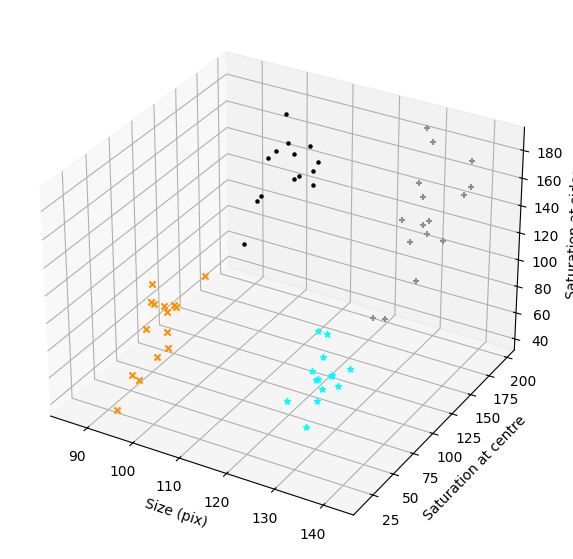

In [7]:
import matplotlib.pyplot as plt
#creates class marker and colour from category ('0.01', '0.02', etc)
def create_marker(ct):
  if ct == '0.01':
    return ('.', '#000000')
  elif ct == '0.02':
    return ('+', '#8F8F8F')
  elif ct == '0.05':
    return ('x', '#FF8F00')
  elif ct == '0.1':
    return ('*', '#00FFFF')
  elif ct == '0.2':
    return ('^', '#FF00FF')
  elif ct == '0.5':
    return ('s', '#00FF00')
  elif ct == '1':
    return ('o', '#0000FF')
  else: #£2
    return ('D', '#FF0000')

fig = plt.figure(figsize=[9.0, 7.0])
ax = fig.add_subplot(projection='3d') #creates mplot3d 3D Axes
ax.set_xlabel('Size (pix)')
ax.set_ylabel('Saturation at centre')
ax.set_zlabel('Saturation at sides')
for row in range(N):
  m, clr = create_marker(Category[row])
  ax.scatter(data[row][0], data[row][1], data[row][2], c = clr, marker = m )
plt.show()

**7)** Classify the new data!

In [8]:
#remove data col 3 (sat diff), leave only Size, SatC, SatSides
Xnew = np.delete(newdata, 3, axis=1)
# COMPLETE THIS (pretty much like step 5)
ynew = model.predict(Xnew)
yprob = model.predict_proba(Xnew)
count = 0
for i in range(N):
  if(ynew[i] == newCategory[i]):
    count = count + 1; #hit
  else: #show mistakes
    print(newCategory[i] + str(X[i]) +'-->'+ynew[i]+ str(yprob[i].round(2)))
print(str(count)+' correct out of ' + str(N))

0.01[103 116 119]-->0.05[0.16 0.   0.7  0.   0.15 0.   0.   0.  ]
0.02[106 180 162]-->0.1[0.   0.22 0.   0.78 0.   0.   0.   0.  ]
57 correct out of 59
